# 와인 퀄리티 예측 데이터셋

- 회귀 문제 이기 때문에 정확도를 보기는 힘들고, RMSE, MAE값으로 모델 성능을 평가할 수 있습니다.

In [8]:
import pandas as pd

df = pd.read_csv('winequality.csv', index_col=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# feature engineering
# null data 처리

# 15-20분정도 잠깐 시간을 드리겠습니다.
# -> 모델링 (와인의 퀄리티를 예측하는 모델을 만드는 것)

# 5시에 만나서 풀이를 해보겠습니다 :)
# 동호님, 봉균님, 승민님 (저에게 연락처를 DM 공유주시면 주말에 티타임)

In [11]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25)

In [14]:
df_train.to_csv("wine_train.csv")
df_test.to_csv("wine_test.csv")

In [15]:
X_train = df_train.drop(['quality'], axis=1)
X_test = df_test.drop(['quality'], axis=1)

y_train = df_train['quality']
y_test = df_test['quality']

In [ ]:
!pip install seaborn

<Axes: >

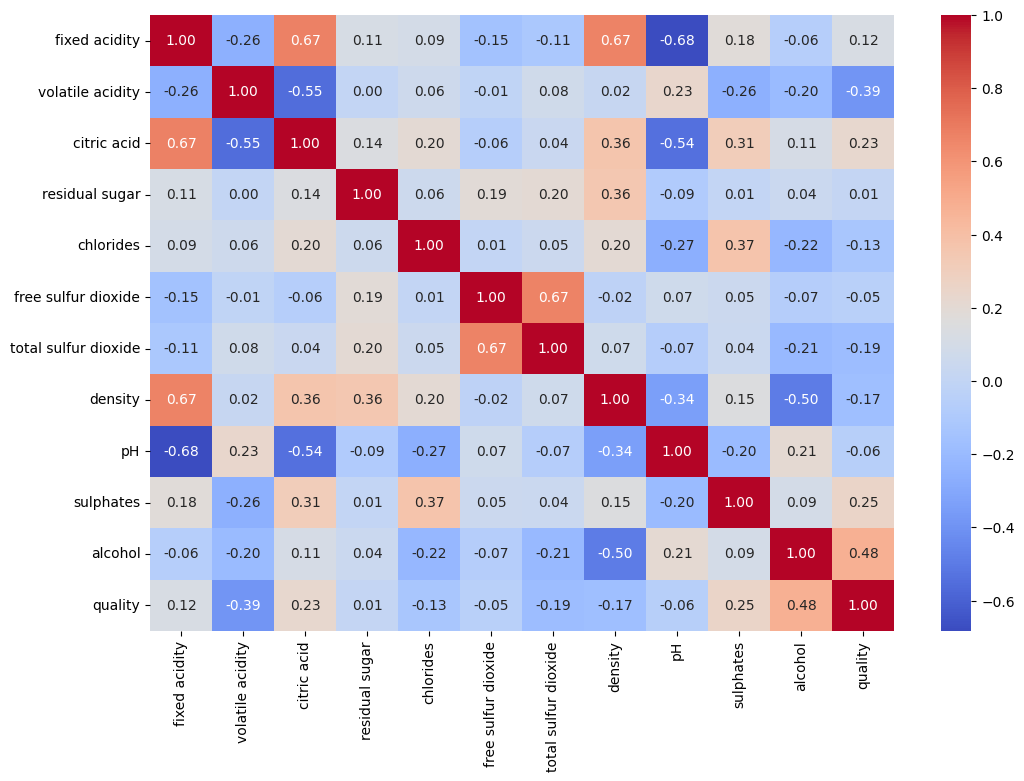

In [21]:
df.corr() # corrleation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [35]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import ElasticNet # feature가 많을 때 활용
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mlflow.autolog() # 필요한 로그는 다 남겨줘.

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment('winequality')

from itertools import product

alpha = [0.2, 0.5, 0.7, 1.0]
l1_ratio = [0.2, 0.5, 0.7, 1.0]

for a, l1 in product(alpha, l1_ratio):
    with mlflow.start_run(nested=True):
        model = ElasticNet(alpha=a, l1_ratio=l1, random_state=123)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mae = mean_absolute_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        accuracy = accuracy_score(y_test, pred)
        
        mlflow.log_param("alpha", a)
        mlflow.log_param("l1_ratio", l1)

        mlflow.log_metric("accuracy", accuracy*100)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)

        print(f'a:{a}, l1:{l1}, accuracy : {accuracy}')

2024/09/20 17:45:12 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2024/09/20 17:45:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/09/20 17:45:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefree-koi-693 at: http://127.0.0.1:5000/#/experiments/525867793490206348/runs/b6c24b37b24c422ba4e59ba15faef901.
2024/09/20 17:45:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/525867793490206348.


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.linear_model import ElasticNet # feature가 많을 때 활용
ElasticNet?

In [27]:
from itertools import product
alpha = [0, 0.2, 0.5, 0.7, 1.0]
l1_ratio = [0, 0.2, 0.5, 0.7, 1.0]

for a, l1 in product(alpha, l1_ratio):

    print(a,l1)

0 0
0 0.2
0 0.5
0 0.7
0 1.0
0.2 0
0.2 0.2
0.2 0.5
0.2 0.7
0.2 1.0
0.5 0
0.5 0.2
0.5 0.5
0.5 0.7
0.5 1.0
0.7 0
0.7 0.2
0.7 0.5
0.7 0.7
0.7 1.0
1.0 0
1.0 0.2
1.0 0.5
1.0 0.7
1.0 1.0


In [41]:
from sklearn.ensemble import RandomForestClassifier

mlflow.set_experiment('winequality')
mlflow.autolog()

n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for n in n_estimators:
    with mlflow.start_run(nested=True):
        model = RandomForestClassifier(n_estimators=n, random_state=123)

        model.fit(X_train, y_train)

        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred)

2024/09/20 17:53:00 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2024/09/20 17:53:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/09/20 17:53:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run marvelous-perch-543 at: http://127.0.0.1:5000/#/experiments/525867793490206348/runs/238c8b5acd3445778f6279e4c224a1b4.
2024/09/20 17:53:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/525867793490206348.
2024/09/20 17:53:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run zealous-worm-588 at: http://127.0.0.1:5000/#/experiments/525867793490206348/runs/072cecb54bae4c0c9d2d54b634de8a52.
2024/09/20 17:53:04 INFO mlflow.tracking._trackin

2024/09/20 17:51:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8155c443108248fa97e5e749af7cb2bf', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2024/09/20 17:51:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-shrew-631 at: http://127.0.0.1:5000/#/experiments/525867793490206348/runs/8155c443108248fa97e5e749af7cb2bf.
2024/09/20 17:51:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/525867793490206348.


0.69